# Clustering NBA Power Forwards
The purpose of this notebook is identify the play style of each player inside the traditional basketball positions. We
will the KMeans clustering algorithm.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
players_data = pd.read_csv('PlayersAdvStats.csv')

power_forwards_data = players_data[players_data['position'] == 'PF']
del power_forwards_data['position']
del power_forwards_data['team_id']
power_forwards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,200794,Paul,Millsap,1974.786,18.405,6.476,6.714,13.190,0.833,2.738,...,0.522563,0.447653,0.063177,8.931694,21.260316,3.252318,12.415469,17.860828,2.918783,24.894147
6,203118,Mike,Scott,849.297,6.946,2.703,2.459,5.162,0.838,2.027,...,0.604712,0.172775,0.162304,4.225610,12.899957,1.248614,9.669480,11.750659,0.900454,19.745126
9,101135,David,Lee,942.276,7.310,2.966,3.483,6.448,0.000,0.034,...,0.459893,0.272727,0.000000,9.338720,21.171531,2.100381,14.667536,18.301883,1.237615,23.407072
10,101161,Amir,Johnson,1463.615,8.282,3.641,2.538,6.179,0.231,0.846,...,0.607884,0.232365,0.037344,9.276624,18.639639,3.686838,15.840831,10.356380,1.346535,14.410474
11,201973,Jonas,Jerebko,803.390,3.537,1.220,1.927,3.146,0.488,1.073,...,0.465116,0.248062,0.155039,6.197878,17.160012,0.871232,15.377336,9.400020,0.840042,13.377028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,203210,JaMychal,Green,945.075,6.100,2.325,2.275,4.600,0.225,0.400,...,0.529891,0.347826,0.048913,9.289673,23.318714,1.852509,16.525024,4.496452,1.211491,20.139409
256,2743,Kris,Humphries,1025.889,6.667,2.370,3.444,5.815,0.852,2.444,...,0.480892,0.197452,0.146497,6.490628,22.614535,2.548181,10.490978,5.298824,0.336480,18.560578
258,201162,Jared,Dudley,1712.026,8.436,3.026,3.308,6.333,1.487,3.179,...,0.595142,0.186235,0.234818,2.692626,12.724468,0.377539,10.991207,9.422369,1.768115,12.126494
267,101141,Ersan,Illyasova,1709.667,11.119,4.119,5.643,9.762,1.476,4.167,...,0.497561,0.204878,0.151220,6.960905,14.771332,1.549595,9.879829,7.096752,1.340604,18.781054


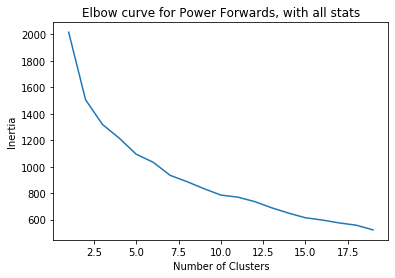

In [4]:
X_unscaled = power_forwards_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.tranpform(X_unscaled)

cluster_number = range(1, 20)
pf_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
pf_inertia = [pf_kmeans_models[i].fit(X).inertia_ for i in range(len(pf_kmeans_models))]
plt.plot(cluster_number, pf_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Power Forwards, with all stats')
plt.savefig('Figures/PF/kmeans-full.png')
plt.show()

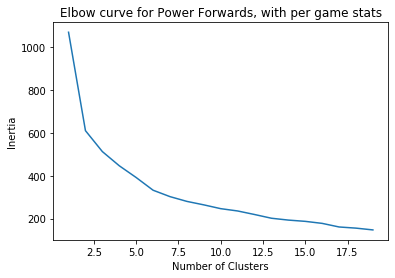

In [5]:
X_per_game_unscaled = power_forwards_data.copy()
X_per_game_unscaled = X_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%', 'DefRtg',
                                                'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate', 'OR%', 'DR%', 'BLK%',
                                                'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_per_game = StandardScaler()
scaler_per_game.fit(X_per_game_unscaled)
X_per_game = scaler_per_game.tranpform(X_per_game_unscaled)

pf_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
pf_inertia_per_game = [pf_kmeans_models_per_game[i].fit(X_per_game).inertia_ for i in range(len(pf_kmeans_models_per_game))]
plt.plot(cluster_number, pf_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Power Forwards, with per game stats')
plt.savefig('Figures/PF/kmeans-per-game.png')
plt.show()

In [3]:
X_advanced_unscaled = power_forwards_data.copy()
X_advanced_unscaled = X_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                'scored_points_per_game', 'field_goals_made_per_game',
                                                'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                'three_points_field_goals_made_per_game',
                                                'three_points_field_goals_attempts_per_game',
                                                'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                'free_throws_attempts_per_game', 'assists_per_game',
                                                'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                'personal_fouls_per_game'], 1)
scaler_advanced = StandardScaler()
scaler_advanced.fit(X_advanced_unscaled)
X_advanced = scaler_advanced.tranpform(X_advanced_unscaled)

pf_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
pf_inertia_advanced = [pf_kmeans_models_advanced[i].fit(X_advanced).inertia_ for i in range(len(pf_kmeans_models_advanced))]
plt.plot(cluster_number, pf_inertia_advanced)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Power Forwards, with advanced stats')
plt.savefig('Figures/PF/kmeans-advanced.png')
plt.show()

NameError: name 'cluster_number' is not defined

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 6.
* For per game statistics input the best number of clusters is 5.
* For advanced statistics input the best number of clusters is 6.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [7]:
# KMeans_pf_full = KMeans(n_clusters=6, n_init=20).fit(X)
# joblib.dump(KMeans_pf_full, 'Models/kmeans_pf_full.sav')

KMeans_pf_full = joblib.load('Models/kmeans_pf_full.sav')

pf_full_predicted_classes = KMeans_pf_full.predict(X)

pf_full = power_forwards_data.copy()
pf_full.insert(1, 'Cluster', pf_full_predicted_classes)
pf_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,200794,5,Paul,Millsap,1974.786,18.405,6.476,6.714,13.190,0.833,...,0.522563,0.447653,0.063177,8.931694,21.260316,3.252318,12.415469,17.860828,2.918783,24.894147
6,203118,3,Mike,Scott,849.297,6.946,2.703,2.459,5.162,0.838,...,0.604712,0.172775,0.162304,4.225610,12.899957,1.248614,9.669480,11.750659,0.900454,19.745126
9,101135,1,David,Lee,942.276,7.310,2.966,3.483,6.448,0.000,...,0.459893,0.272727,0.000000,9.338720,21.171531,2.100381,14.667536,18.301883,1.237615,23.407072
10,101161,2,Amir,Johnson,1463.615,8.282,3.641,2.538,6.179,0.231,...,0.607884,0.232365,0.037344,9.276624,18.639639,3.686838,15.840831,10.356380,1.346535,14.410474
11,201973,1,Jonas,Jerebko,803.390,3.537,1.220,1.927,3.146,0.488,...,0.465116,0.248062,0.155039,6.197878,17.160012,0.871232,15.377336,9.400020,0.840042,13.377028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,203210,1,JaMychal,Green,945.075,6.100,2.325,2.275,4.600,0.225,...,0.529891,0.347826,0.048913,9.289673,23.318714,1.852509,16.525024,4.496452,1.211491,20.139409
256,2743,3,Kris,Humphries,1025.889,6.667,2.370,3.444,5.815,0.852,...,0.480892,0.197452,0.146497,6.490628,22.614535,2.548181,10.490978,5.298824,0.336480,18.560578
258,201162,3,Jared,Dudley,1712.026,8.436,3.026,3.308,6.333,1.487,...,0.595142,0.186235,0.234818,2.692626,12.724468,0.377539,10.991207,9.422369,1.768115,12.126494
267,101141,3,Ersan,Illyasova,1709.667,11.119,4.119,5.643,9.762,1.476,...,0.497561,0.204878,0.151220,6.960905,14.771332,1.549595,9.879829,7.096752,1.340604,18.781054


In [8]:
pf_full_cluster_size = pd.DataFrame()
pf_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
pf_full_cluster_size['Players'] = pf_full.groupby('Cluster').size()
pf_full_cluster_size

,Cluster,Players
0,0,12
1,1,14
2,2,9
3,3,17
4,4,7
5,5,4


In [9]:
# KMeans_pf_per_game = KMeans(n_clusters=5, n_init=20).fit(X_per_game)
# joblib.dump(KMeans_pf_per_game, 'Models/kmeans_pf_per_game.sav')

KMeans_pf_per_game = joblib.load('Models/kmeans_pf_per_game.sav')

pf_per_game_predicted_classes = KMeans_pf_per_game.predict(X_per_game)

pf_per_game = power_forwards_data.copy()
pf_per_game.insert(1, 'Cluster', pf_per_game_predicted_classes)
pf_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,200794,3,Paul,Millsap,1974.786,18.405,6.476,6.714,13.190,0.833,...,0.522563,0.447653,0.063177,8.931694,21.260316,3.252318,12.415469,17.860828,2.918783,24.894147
6,203118,0,Mike,Scott,849.297,6.946,2.703,2.459,5.162,0.838,...,0.604712,0.172775,0.162304,4.225610,12.899957,1.248614,9.669480,11.750659,0.900454,19.745126
9,101135,0,David,Lee,942.276,7.310,2.966,3.483,6.448,0.000,...,0.459893,0.272727,0.000000,9.338720,21.171531,2.100381,14.667536,18.301883,1.237615,23.407072
10,101161,4,Amir,Johnson,1463.615,8.282,3.641,2.538,6.179,0.231,...,0.607884,0.232365,0.037344,9.276624,18.639639,3.686838,15.840831,10.356380,1.346535,14.410474
11,201973,0,Jonas,Jerebko,803.390,3.537,1.220,1.927,3.146,0.488,...,0.465116,0.248062,0.155039,6.197878,17.160012,0.871232,15.377336,9.400020,0.840042,13.377028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,203210,0,JaMychal,Green,945.075,6.100,2.325,2.275,4.600,0.225,...,0.529891,0.347826,0.048913,9.289673,23.318714,1.852509,16.525024,4.496452,1.211491,20.139409
256,2743,0,Kris,Humphries,1025.889,6.667,2.370,3.444,5.815,0.852,...,0.480892,0.197452,0.146497,6.490628,22.614535,2.548181,10.490978,5.298824,0.336480,18.560578
258,201162,2,Jared,Dudley,1712.026,8.436,3.026,3.308,6.333,1.487,...,0.595142,0.186235,0.234818,2.692626,12.724468,0.377539,10.991207,9.422369,1.768115,12.126494
267,101141,2,Ersan,Illyasova,1709.667,11.119,4.119,5.643,9.762,1.476,...,0.497561,0.204878,0.151220,6.960905,14.771332,1.549595,9.879829,7.096752,1.340604,18.781054


In [10]:
pf_per_game_cluster_size = pd.DataFrame()
pf_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pf_per_game_cluster_size['Players'] = pf_per_game.groupby('Cluster').size()
pf_per_game_cluster_size

,Cluster,Players
0,0,24
1,1,10
2,2,11
3,3,6
4,4,12


In [42]:
# KMeans_pf_advanced = KMeans(n_clusters=6, n_init=20).fit(X_advanced)
# joblib.dump(KMeans_pf_advanced, 'Models/kmeans_pf_advanced.sav')

KMeans_pf_advanced = joblib.load('Models/kmeans_pf_advanced.sav')

pf_advanced_predicted_classes = KMeans_pf_advanced.predict(X_advanced)

pf_advanced = power_forwards_data.copy()
pf_advanced.insert(1, 'Cluster', pf_advanced_predicted_classes)
pf_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,200794,3,Paul,Millsap,1974.79,18.41,6.48,6.71,13.19,0.83,...,0.52,0.45,0.06,8.93,21.26,3.25,12.42,17.86,2.92,24.89
6,203118,2,Mike,Scott,849.30,6.95,2.70,2.46,5.16,0.84,...,0.60,0.17,0.16,4.23,12.90,1.25,9.67,11.75,0.90,19.75
9,101135,1,David,Lee,942.28,7.31,2.97,3.48,6.45,0.00,...,0.46,0.27,0.00,9.34,21.17,2.10,14.67,18.30,1.24,23.41
10,101161,0,Amir,Johnson,1463.62,8.28,3.64,2.54,6.18,0.23,...,0.61,0.23,0.04,9.28,18.64,3.69,15.84,10.36,1.35,14.41
11,201973,4,Jonas,Jerebko,803.39,3.54,1.22,1.93,3.15,0.49,...,0.47,0.25,0.16,6.20,17.16,0.87,15.38,9.40,0.84,13.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,203210,5,JaMychal,Green,945.08,6.10,2.33,2.27,4.60,0.23,...,0.53,0.35,0.05,9.29,23.32,1.85,16.53,4.50,1.21,20.14
256,2743,5,Kris,Humphries,1025.89,6.67,2.37,3.44,5.82,0.85,...,0.48,0.20,0.15,6.49,22.61,2.55,10.49,5.30,0.34,18.56
258,201162,2,Jared,Dudley,1712.03,8.44,3.03,3.31,6.33,1.49,...,0.60,0.19,0.23,2.69,12.72,0.38,10.99,9.42,1.77,12.13
267,101141,2,Ersan,Illyasova,1709.67,11.12,4.12,5.64,9.76,1.48,...,0.50,0.20,0.15,6.96,14.77,1.55,9.88,7.10,1.34,18.78


In [43]:
pf_advanced_cluster_size = pd.DataFrame()
pf_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
pf_advanced_cluster_size['Players'] = pf_advanced.groupby('Cluster').size()
pf_advanced_cluster_size

,Cluster,Players
0,0,7
1,1,11
2,2,17
3,3,9
4,4,8
5,5,11


Now we are going to extract the mean stats and members for each cluster.
#### Model fitted with all stats.

In [13]:
pf_full['played_minutes_per_game'] = pf_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_full_cluster0 = pf_full[pf_full['Cluster'] == 0]
pf_full_cluster0 = pf_full_cluster0.drop(['player_id'], 1)
pf_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
15,0,Jared,Sullinger,24.38,9.88,4.05,5.63,9.68,0.46,1.63,...,0.44,0.22,0.05,11.28,28.38,2.23,11.22,14.14,1.95,21.30
36,0,Pau,Gasol,31.04,16.54,6.51,7.49,14.00,0.23,0.67,...,0.47,0.30,0.02,8.33,26.58,4.94,11.09,17.81,0.99,24.68
60,0,Kenneth,Faried,26.83,12.44,5.19,4.56,9.75,0.00,0.03,...,0.53,0.37,0.00,15.15,23.55,3.49,11.29,7.60,0.89,21.82
84,0,Terrence,Jone,23.61,10.40,4.00,4.49,8.49,0.68,1.89,...,0.51,0.31,0.08,7.51,16.73,3.36,10.97,7.33,1.08,20.35
103,0,Julius,Randle,26.55,10.58,4.12,6.09,10.21,0.12,0.42,...,0.41,0.32,0.01,9.62,33.38,1.15,13.31,11.83,1.37,23.91
135,0,Thaddeus,Young,32.28,15.24,6.85,6.54,13.39,0.12,0.54,...,0.52,0.17,0.01,9.39,22.68,1.03,11.66,9.29,2.47,23.14
147,0,Kristaps,Porzingis,28.07,13.91,5.07,6.91,11.98,1.09,3.22,...,0.47,0.26,0.09,8.83,22.69,5.64,11.62,7.20,1.41,24.41
175,0,Jerami,Grant,25.52,8.90,3.05,4.07,7.12,0.41,1.85,...,0.46,0.50,0.06,5.52,15.68,4.98,12.54,9.40,1.44,19.27
184,0,Markieff,Morris,22.80,10.23,4.15,6.85,11.00,0.65,2.12,...,0.41,0.16,0.06,5.56,19.45,1.17,15.92,14.21,1.39,26.75
213,0,LaMarcus,Aldridge,29.83,16.22,6.76,7.05,13.81,0.00,0.27,...,0.49,0.25,0.00,11.61,24.32,2.53,8.56,7.57,0.64,27.40


In [15]:
pf_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       27.71
scored_points_per_game                        12.62
field_goals_made_per_game                      5.09
field_goals_miss_per_game                      6.00
field_goals_attempts_per_game                 11.08
three_points_field_goals_made_per_game         0.38
three_points_field_goals_attempts_per_game     1.24
free_throws_made_per_game                      2.06
free_throws_miss_per_game                      0.84
free_throws_attempts_per_game                  2.90
assists_per_game                               1.56
offensive_rebounds_per_game                    2.27
defensive_rebounds_per_game                    5.55
steals_per_game                                0.67
blocks_per_game                                1.07
turnovers_per_game                             1.62
personal_fouls_per_game                        2.55
OffRtg                                       111.61
Floor%      

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_full_cluster1 = pf_full[pf_full['Cluster'] == 1]
pf_full_cluster1 = pf_full_cluster1.drop(['player_id'], 1)
pf_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
9,1,David,Lee,15.70,7.31,2.97,3.48,6.45,0.00,0.03,...,0.46,0.27,0.00,9.34,21.17,2.10,14.67,18.30,1.24,23.41
11,1,Jonas,Jerebko,13.39,3.54,1.22,1.93,3.15,0.49,1.07,...,0.47,0.25,0.16,6.20,17.16,0.87,15.38,9.40,0.84,13.38
55,1,Dwight,Powell,17.31,6.54,2.49,2.71,5.20,0.00,0.17,...,0.48,0.41,0.00,10.08,24.27,2.37,10.35,8.04,1.95,20.04
88,1,Josh,Smith,13.82,5.52,2.14,3.38,5.52,0.62,1.76,...,0.44,0.20,0.11,7.98,19.80,6.34,16.34,12.27,2.10,23.28
92,1,Luc,Mbah a Moute,15.22,2.97,1.17,1.44,2.61,0.25,0.64,...,0.49,0.26,0.10,6.88,11.11,1.65,12.55,3.01,1.44,9.78
120,1,Johnny,O'Bryant,14.62,3.54,1.51,1.90,3.42,0.02,0.02,...,0.45,0.22,0.01,9.71,15.99,0.72,13.02,7.63,1.34,14.91
122,1,Kevin,Garnett,14.62,3.30,1.46,1.59,3.05,0.00,0.03,...,0.48,0.19,0.00,3.14,28.38,1.63,11.57,17.21,2.59,11.64
146,1,Kyle,O'Quinn,11.45,4.37,1.83,1.91,3.74,0.00,0.29,...,0.49,0.25,0.00,12.89,24.66,4.15,20.71,17.77,2.02,20.76
169,1,Lavoy,Allen,22.13,5.75,2.67,2.73,5.40,0.00,0.00,...,0.50,0.13,0.00,10.72,16.54,2.14,14.91,6.91,1.04,13.48
198,1,Noah,Vonleh,15.69,3.40,1.40,1.98,3.38,0.09,0.49,...,0.43,0.18,0.03,9.28,19.39,1.30,13.66,5.11,1.65,12.57


In [17]:
pf_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       16.00
scored_points_per_game                         4.63
field_goals_made_per_game                      1.87
field_goals_miss_per_game                      2.28
field_goals_attempts_per_game                  4.15
three_points_field_goals_made_per_game         0.16
three_points_field_goals_attempts_per_game     0.45
free_throws_made_per_game                      0.74
free_throws_miss_per_game                      0.31
free_throws_attempts_per_game                  1.05
assists_per_game                               0.91
offensive_rebounds_per_game                    1.28
defensive_rebounds_per_game                    2.76
steals_per_game                                0.46
blocks_per_game                                0.39
turnovers_per_game                             0.83
personal_fouls_per_game                        1.91
OffRtg                                       111.17
Floor%      

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_full_cluster2 = pf_full[pf_full['Cluster'] == 2]
pf_full_cluster2 = pf_full_cluster2.drop(['player_id'], 1)
pf_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
10,2,Amir,Johnson,24.39,8.28,3.64,2.54,6.18,0.23,0.85,...,0.61,0.23,0.04,9.28,18.64,3.69,15.84,10.36,1.35,14.41
41,2,Taj,Gibson,25.91,7.85,3.35,3.12,6.47,0.00,0.05,...,0.52,0.26,0.00,11.72,16.18,2.99,11.91,7.74,0.91,13.59
98,2,Brandon,Bass,17.94,6.30,2.49,1.95,4.43,0.00,0.03,...,0.56,0.35,0.00,9.86,17.86,3.96,9.55,12.12,1.46,14.90
159,2,Aaron,Gordon,20.14,7.45,2.80,2.85,5.65,0.47,1.38,...,0.54,0.35,0.08,9.79,19.06,3.02,11.55,9.60,1.51,16.37
191,2,Ed,Davis,21.35,6.71,2.66,1.66,4.32,0.00,0.00,...,0.62,0.63,0.00,15.87,23.69,2.84,12.62,8.62,1.53,13.78
211,2,David,West,16.64,6.40,2.85,2.27,5.12,0.03,0.07,...,0.56,0.19,0.00,5.97,21.97,2.88,14.30,16.00,1.87,18.99
212,2,Boris,Diaw,19.39,7.12,2.95,2.54,5.49,0.37,0.95,...,0.57,0.21,0.07,5.80,14.51,0.90,17.99,20.17,1.15,18.43
231,2,James,Johnson,15.26,5.24,2.09,1.79,3.88,0.32,0.91,...,0.58,0.30,0.08,4.35,12.52,3.01,17.62,10.46,1.76,16.10
235,2,Bismack,Biyombo,23.02,5.26,1.79,1.81,3.60,0.00,0.00,...,0.50,0.72,0.00,12.28,29.82,5.93,18.48,1.55,0.44,11.58


In [19]:
pf_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       20.45
scored_points_per_game                         6.73
field_goals_made_per_game                      2.73
field_goals_miss_per_game                      2.28
field_goals_attempts_per_game                  5.02
three_points_field_goals_made_per_game         0.16
three_points_field_goals_attempts_per_game     0.47
free_throws_made_per_game                      1.11
free_throws_miss_per_game                      0.58
free_throws_attempts_per_game                  1.69
assists_per_game                               1.33
offensive_rebounds_per_game                    1.76
defensive_rebounds_per_game                    3.58
steals_per_game                                0.49
blocks_per_game                                0.82
turnovers_per_game                             0.97
personal_fouls_per_game                        2.14
OffRtg                                       129.46
Floor%      

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_full_cluster3 = pf_full[pf_full['Cluster'] == 3]
pf_full_cluster3 = pf_full_cluster3.drop(['player_id'], 1)
pf_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
6,3,Mike,Scott,14.15,6.95,2.70,2.46,5.16,0.84,2.03,...,0.60,0.17,0.16,4.23,12.90,1.25,9.67,11.75,0.90,19.75
42,3,Nikola,Mirotic,23.87,10.15,3.27,5.33,8.60,1.62,4.67,...,0.48,0.30,0.19,4.43,19.10,2.01,12.19,9.31,1.81,19.96
51,3,Charlie,Villanueva,12.01,5.83,2.37,3.86,6.23,0.74,3.14,...,0.44,0.06,0.12,3.57,22.89,2.20,7.06,7.56,1.39,29.06
59,3,Darrell,Arthur,21.10,7.40,3.25,3.58,6.83,0.40,1.00,...,0.51,0.09,0.06,6.53,16.01,3.07,11.53,9.53,2.17,17.40
107,3,Luol,Deng,30.91,10.06,3.64,4.97,8.61,1.21,3.46,...,0.49,0.24,0.14,3.63,14.41,0.80,8.73,8.02,1.47,16.46
126,3,Nemanja,Bjielica,18.53,4.50,1.60,2.29,3.90,0.84,2.40,...,0.52,0.20,0.22,4.99,17.05,1.88,14.38,11.01,1.30,12.14
144,3,Lance,Thomas,21.49,8.71,3.07,3.57,6.64,0.79,1.93,...,0.52,0.30,0.12,3.38,7.79,0.44,12.47,6.97,1.07,18.13
150,3,Channing,Fry,17.92,5.61,1.94,2.44,4.39,1.25,3.03,...,0.59,0.12,0.28,3.32,16.63,1.81,12.61,9.22,1.65,13.23
154,3,Andrew,Nicholson,16.93,6.93,2.71,3.23,5.93,0.77,2.13,...,0.52,0.16,0.13,4.94,21.73,1.72,12.04,3.28,0.61,19.15
185,3,Jon,Leuer,20.69,8.92,3.62,3.74,7.36,0.82,1.95,...,0.55,0.16,0.11,5.63,25.85,1.82,14.01,10.31,1.53,19.25


In [21]:
pf_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       21.54
scored_points_per_game                         8.06
field_goals_made_per_game                      3.00
field_goals_miss_per_game                      3.85
field_goals_attempts_per_game                  6.85
three_points_field_goals_made_per_game         1.11
three_points_field_goals_attempts_per_game     2.96
free_throws_made_per_game                      0.96
free_throws_miss_per_game                      0.24
free_throws_attempts_per_game                  1.20
assists_per_game                               1.10
offensive_rebounds_per_game                    0.91
defensive_rebounds_per_game                    3.25
steals_per_game                                0.55
blocks_per_game                                0.42
turnovers_per_game                             0.88
personal_fouls_per_game                        1.87
OffRtg                                       118.95
Floor%      

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_full_cluster4 = pf_full[pf_full['Cluster'] == 4]
pf_full_cluster4 = pf_full_cluster4.drop(['player_id'], 1)
pf_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
23,4,Kevin,Love,32.40,15.46,5.26,7.51,12.77,1.87,5.38,...,0.48,0.31,0.15,8.95,29.72,1.42,11.84,12.49,1.58,23.85
29,4,Ryan,Anderson,31.44,17.02,6.00,7.58,13.57,2.12,5.42,...,0.52,0.24,0.16,6.61,16.56,1.07,9.62,6.97,0.97,28.96
47,4,Dirk,Nowitzki,31.73,18.20,6.54,7.95,14.49,1.82,4.62,...,0.51,0.25,0.13,2.80,22.38,1.70,6.55,12.22,1.08,27.56
58,4,Danilo,Gallinari,34.56,19.16,5.35,7.92,13.27,1.70,4.65,...,0.47,0.58,0.13,3.52,16.12,1.08,6.94,12.60,1.01,23.73
105,4,Chris,Bosh,33.18,19.05,6.70,7.42,14.12,1.57,4.28,...,0.53,0.36,0.11,3.78,23.62,1.77,8.01,14.29,1.17,26.20
153,4,Tobias,Harris,32.56,13.63,5.10,5.98,11.07,0.85,2.98,...,0.50,0.29,0.08,4.89,19.54,1.82,10.79,10.27,1.67,19.29
204,4,Omri,Casspi,29.79,12.31,4.64,4.50,9.14,1.81,4.11,...,0.61,0.22,0.20,3.26,20.51,0.81,14.44,7.40,1.18,16.70


In [23]:
pf_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       32.24
scored_points_per_game                        16.41
field_goals_made_per_game                      5.65
field_goals_miss_per_game                      6.98
field_goals_attempts_per_game                 12.63
three_points_field_goals_made_per_game         1.68
three_points_field_goals_attempts_per_game     4.49
free_throws_made_per_game                      3.42
free_throws_miss_per_game                      0.73
free_throws_attempts_per_game                  4.15
assists_per_game                               1.98
offensive_rebounds_per_game                    1.35
defensive_rebounds_per_game                    5.89
steals_per_game                                0.75
blocks_per_game                                0.52
turnovers_per_game                             1.51
personal_fouls_per_game                        2.00
OffRtg                                       117.53
Floor%      

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_full_cluster5 = pf_full[pf_full['Cluster'] == 5]
pf_full_cluster5 = pf_full_cluster5.drop(['player_id'], 1)
pf_full_cluster5

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,5,Paul,Millsap,32.91,18.41,6.48,6.71,13.19,0.83,2.74,...,0.52,0.45,0.06,8.93,21.26,3.25,12.42,17.86,2.92,24.89
75,5,Draymond,Green,34.14,15.10,5.37,5.83,11.20,1.49,3.68,...,0.55,0.38,0.13,6.33,23.65,2.80,17.82,30.70,1.99,20.73
93,5,Blake,Griffin,34.92,23.50,9.57,9.00,18.57,0.21,0.61,...,0.52,0.30,0.01,5.49,22.57,1.43,9.94,26.39,1.07,30.00
238,5,Derrick,Favors,32.23,16.85,6.88,6.27,13.15,0.00,0.04,...,0.52,0.33,0.00,12.08,21.22,3.16,8.83,9.65,2.52,24.36


In [25]:
pf_full_cluster5.mean()

Cluster                                        5.00
played_minutes_per_game                       33.55
scored_points_per_game                        18.46
field_goals_made_per_game                      7.07
field_goals_miss_per_game                      6.95
field_goals_attempts_per_game                 14.03
three_points_field_goals_made_per_game         0.63
three_points_field_goals_attempts_per_game     1.77
free_throws_made_per_game                      3.68
free_throws_miss_per_game                      1.35
free_throws_attempts_per_game                  5.03
assists_per_game                               4.30
offensive_rebounds_per_game                    2.30
defensive_rebounds_per_game                    6.70
steals_per_game                                1.34
blocks_per_game                                1.09
turnovers_per_game                             2.21
personal_fouls_per_game                        2.92
OffRtg                                       123.03
Floor%      

#### Model fitted with per game stats.

In [26]:
pf_per_game['played_minutes_per_game'] = pf_per_game['played_minutes_per_game'].apply(lambda sec: sec/60)

In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_per_game_cluster0 = pf_per_game[pf_per_game['Cluster'] == 0]
pf_per_game_cluster0 = pf_per_game_cluster0.drop(['player_id'], 1)
pf_per_game_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
6,0,Mike,Scott,14.15,6.95,2.70,2.46,5.16,0.84,2.03,...,0.60,0.17,0.16,4.23,12.90,1.25,9.67,11.75,0.90,19.75
9,0,David,Lee,15.70,7.31,2.97,3.48,6.45,0.00,0.03,...,0.46,0.27,0.00,9.34,21.17,2.10,14.67,18.30,1.24,23.41
11,0,Jonas,Jerebko,13.39,3.54,1.22,1.93,3.15,0.49,1.07,...,0.47,0.25,0.16,6.20,17.16,0.87,15.38,9.40,0.84,13.38
51,0,Charlie,Villanueva,12.01,5.83,2.37,3.86,6.23,0.74,3.14,...,0.44,0.06,0.12,3.57,22.89,2.20,7.06,7.56,1.39,29.06
88,0,Josh,Smith,13.82,5.52,2.14,3.38,5.52,0.62,1.76,...,0.44,0.20,0.11,7.98,19.80,6.34,16.34,12.27,2.10,23.28
92,0,Luc,Mbah a Moute,15.22,2.97,1.17,1.44,2.61,0.25,0.64,...,0.49,0.26,0.10,6.88,11.11,1.65,12.55,3.01,1.44,9.78
98,0,Brandon,Bass,17.94,6.30,2.49,1.95,4.43,0.00,0.03,...,0.56,0.35,0.00,9.86,17.86,3.96,9.55,12.12,1.46,14.90
120,0,Johnny,O'Bryant,14.62,3.54,1.51,1.90,3.42,0.02,0.02,...,0.45,0.22,0.01,9.71,15.99,0.72,13.02,7.63,1.34,14.91
122,0,Kevin,Garnett,14.62,3.30,1.46,1.59,3.05,0.00,0.03,...,0.48,0.19,0.00,3.14,28.38,1.63,11.57,17.21,2.59,11.64
126,0,Nemanja,Bjielica,18.53,4.50,1.60,2.29,3.90,0.84,2.40,...,0.52,0.20,0.22,4.99,17.05,1.88,14.38,11.01,1.30,12.14


In [28]:
pf_per_game_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       16.43
scored_points_per_game                         5.38
field_goals_made_per_game                      2.12
field_goals_miss_per_game                      2.49
field_goals_attempts_per_game                  4.61
three_points_field_goals_made_per_game         0.43
three_points_field_goals_attempts_per_game     1.20
free_throws_made_per_game                      0.71
free_throws_miss_per_game                      0.24
free_throws_attempts_per_game                  0.95
assists_per_game                               1.01
offensive_rebounds_per_game                    0.95
defensive_rebounds_per_game                    2.57
steals_per_game                                0.41
blocks_per_game                                0.39
turnovers_per_game                             0.81
personal_fouls_per_game                        1.73
OffRtg                                       115.45
Floor%      

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_per_game_cluster1 = pf_per_game[pf_per_game['Cluster'] == 1]
pf_per_game_cluster1 = pf_per_game_cluster1.drop(['player_id'], 1)
pf_per_game_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
15,1,Jared,Sullinger,24.38,9.88,4.05,5.63,9.68,0.46,1.63,...,0.44,0.22,0.05,11.28,28.38,2.23,11.22,14.14,1.95,21.30
36,1,Pau,Gasol,31.04,16.54,6.51,7.49,14.00,0.23,0.67,...,0.47,0.30,0.02,8.33,26.58,4.94,11.09,17.81,0.99,24.68
60,1,Kenneth,Faried,26.83,12.44,5.19,4.56,9.75,0.00,0.03,...,0.53,0.37,0.00,15.15,23.55,3.49,11.29,7.60,0.89,21.82
103,1,Julius,Randle,26.55,10.58,4.12,6.09,10.21,0.12,0.42,...,0.41,0.32,0.01,9.62,33.38,1.15,13.31,11.83,1.37,23.91
135,1,Thaddeus,Young,32.28,15.24,6.85,6.54,13.39,0.12,0.54,...,0.52,0.17,0.01,9.39,22.68,1.03,11.66,9.29,2.47,23.14
147,1,Kristaps,Porzingis,28.07,13.91,5.07,6.91,11.98,1.09,3.22,...,0.47,0.26,0.09,8.83,22.69,5.64,11.62,7.20,1.41,24.41
213,1,LaMarcus,Aldridge,29.83,16.22,6.76,7.05,13.81,0.00,0.27,...,0.49,0.25,0.00,11.61,24.32,2.53,8.56,7.57,0.64,27.40
222,1,Serge,Ibaka,32.45,13.11,5.54,5.71,11.25,0.82,2.02,...,0.53,0.14,0.07,6.54,16.18,5.43,11.90,4.01,0.62,18.57
238,1,Derrick,Favors,32.23,16.85,6.88,6.27,13.15,0.00,0.04,...,0.52,0.33,0.00,12.08,21.22,3.16,8.83,9.65,2.52,24.36
248,1,Zach,Randolph,29.15,13.97,5.74,6.57,12.31,0.03,0.17,...,0.47,0.26,0.00,12.60,22.77,0.76,9.95,10.00,1.23,26.07


In [30]:
pf_per_game_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       29.28
scored_points_per_game                        13.87
field_goals_made_per_game                      5.67
field_goals_miss_per_game                      6.28
field_goals_attempts_per_game                 11.95
three_points_field_goals_made_per_game         0.29
three_points_field_goals_attempts_per_game     0.90
free_throws_made_per_game                      2.24
free_throws_miss_per_game                      0.88
free_throws_attempts_per_game                  3.12
assists_per_game                               1.60
offensive_rebounds_per_game                    2.65
defensive_rebounds_per_game                    6.14
steals_per_game                                0.77
blocks_per_game                                1.12
turnovers_per_game                             1.62
personal_fouls_per_game                        2.55
OffRtg                                       115.17
Floor%      

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_per_game_cluster2 = pf_per_game[pf_per_game['Cluster'] == 2]
pf_per_game_cluster2 = pf_per_game_cluster2.drop(['player_id'], 1)
pf_per_game_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
29,2,Ryan,Anderson,31.44,17.02,6.00,7.58,13.57,2.12,5.42,...,0.52,0.24,0.16,6.61,16.56,1.07,9.62,6.97,0.97,28.96
42,2,Nikola,Mirotic,23.87,10.15,3.27,5.33,8.60,1.62,4.67,...,0.48,0.30,0.19,4.43,19.10,2.01,12.19,9.31,1.81,19.96
47,2,Dirk,Nowitzki,31.73,18.20,6.54,7.95,14.49,1.82,4.62,...,0.51,0.25,0.13,2.80,22.38,1.70,6.55,12.22,1.08,27.56
107,2,Luol,Deng,30.91,10.06,3.64,4.97,8.61,1.21,3.46,...,0.49,0.24,0.14,3.63,14.41,0.80,8.73,8.02,1.47,16.46
153,2,Tobias,Harris,32.56,13.63,5.10,5.98,11.07,0.85,2.98,...,0.50,0.29,0.08,4.89,19.54,1.82,10.79,10.27,1.67,19.29
184,2,Markieff,Morris,22.80,10.23,4.15,6.85,11.00,0.65,2.12,...,0.41,0.16,0.06,5.56,19.45,1.17,15.92,14.21,1.39,26.75
186,2,Mirza,Teletovic,18.29,10.02,3.45,4.33,7.79,2.19,5.02,...,0.58,0.16,0.28,3.55,16.50,1.24,9.56,9.34,1.00,21.92
204,2,Omri,Casspi,29.79,12.31,4.64,4.50,9.14,1.81,4.11,...,0.61,0.22,0.20,3.26,20.51,0.81,14.44,7.40,1.18,16.70
258,2,Jared,Dudley,28.53,8.44,3.03,3.31,6.33,1.49,3.18,...,0.60,0.19,0.23,2.69,12.72,0.38,10.99,9.42,1.77,12.13
267,2,Ersan,Illyasova,28.49,11.12,4.12,5.64,9.76,1.48,4.17,...,0.50,0.20,0.15,6.96,14.77,1.55,9.88,7.10,1.34,18.78


In [32]:
pf_per_game_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       27.93
scored_points_per_game                        11.87
field_goals_made_per_game                      4.29
field_goals_miss_per_game                      5.55
field_goals_attempts_per_game                  9.84
three_points_field_goals_made_per_game         1.53
three_points_field_goals_attempts_per_game     3.99
free_throws_made_per_game                      1.77
free_throws_miss_per_game                      0.46
free_throws_attempts_per_game                  2.23
assists_per_game                               1.53
offensive_rebounds_per_game                    1.13
defensive_rebounds_per_game                    4.37
steals_per_game                                0.71
blocks_per_game                                0.48
turnovers_per_game                             1.28
personal_fouls_per_game                        2.05
OffRtg                                       118.46
Floor%      

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_per_game_cluster3 = pf_per_game[pf_per_game['Cluster'] == 3]
pf_per_game_cluster3 = pf_per_game_cluster3.drop(['player_id'], 1)
pf_per_game_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,3,Paul,Millsap,32.91,18.41,6.48,6.71,13.19,0.83,2.74,...,0.52,0.45,0.06,8.93,21.26,3.25,12.42,17.86,2.92,24.89
23,3,Kevin,Love,32.40,15.46,5.26,7.51,12.77,1.87,5.38,...,0.48,0.31,0.15,8.95,29.72,1.42,11.84,12.49,1.58,23.85
58,3,Danilo,Gallinari,34.56,19.16,5.35,7.92,13.27,1.70,4.65,...,0.47,0.58,0.13,3.52,16.12,1.08,6.94,12.60,1.01,23.73
75,3,Draymond,Green,34.14,15.10,5.37,5.83,11.20,1.49,3.68,...,0.55,0.38,0.13,6.33,23.65,2.80,17.82,30.70,1.99,20.73
93,3,Blake,Griffin,34.92,23.50,9.57,9.00,18.57,0.21,0.61,...,0.52,0.30,0.01,5.49,22.57,1.43,9.94,26.39,1.07,30.00
105,3,Chris,Bosh,33.18,19.05,6.70,7.42,14.12,1.57,4.28,...,0.53,0.36,0.11,3.78,23.62,1.77,8.01,14.29,1.17,26.20


In [34]:
pf_per_game_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       33.68
scored_points_per_game                        18.45
field_goals_made_per_game                      6.45
field_goals_miss_per_game                      7.40
field_goals_attempts_per_game                 13.85
three_points_field_goals_made_per_game         1.28
three_points_field_goals_attempts_per_game     3.56
free_throws_made_per_game                      4.26
free_throws_miss_per_game                      1.16
free_throws_attempts_per_game                  5.42
assists_per_game                               3.85
offensive_rebounds_per_game                    1.77
defensive_rebounds_per_game                    6.87
steals_per_game                                1.04
blocks_per_game                                0.82
turnovers_per_game                             2.00
personal_fouls_per_game                        2.47
OffRtg                                       119.56
Floor%      

In [35]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_per_game_cluster4 = pf_per_game[pf_per_game['Cluster'] == 4]
pf_per_game_cluster4 = pf_per_game_cluster4.drop(['player_id'], 1)
pf_per_game_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
10,4,Amir,Johnson,24.39,8.28,3.64,2.54,6.18,0.23,0.85,...,0.61,0.23,0.04,9.28,18.64,3.69,15.84,10.36,1.35,14.41
41,4,Taj,Gibson,25.91,7.85,3.35,3.12,6.47,0.00,0.05,...,0.52,0.26,0.00,11.72,16.18,2.99,11.91,7.74,0.91,13.59
55,4,Dwight,Powell,17.31,6.54,2.49,2.71,5.20,0.00,0.17,...,0.48,0.41,0.00,10.08,24.27,2.37,10.35,8.04,1.95,20.04
59,4,Darrell,Arthur,21.10,7.40,3.25,3.58,6.83,0.40,1.00,...,0.51,0.09,0.06,6.53,16.01,3.07,11.53,9.53,2.17,17.40
84,4,Terrence,Jone,23.61,10.40,4.00,4.49,8.49,0.68,1.89,...,0.51,0.31,0.08,7.51,16.73,3.36,10.97,7.33,1.08,20.35
159,4,Aaron,Gordon,20.14,7.45,2.80,2.85,5.65,0.47,1.38,...,0.54,0.35,0.08,9.79,19.06,3.02,11.55,9.60,1.51,16.37
175,4,Jerami,Grant,25.52,8.90,3.05,4.07,7.12,0.41,1.85,...,0.46,0.50,0.06,5.52,15.68,4.98,12.54,9.40,1.44,19.27
185,4,Jon,Leuer,20.69,8.92,3.62,3.74,7.36,0.82,1.95,...,0.55,0.16,0.11,5.63,25.85,1.82,14.01,10.31,1.53,19.25
191,4,Ed,Davis,21.35,6.71,2.66,1.66,4.32,0.00,0.00,...,0.62,0.63,0.00,15.87,23.69,2.84,12.62,8.62,1.53,13.78
228,4,Luis,Scola,23.59,10.12,4.21,4.88,9.10,0.69,1.67,...,0.50,0.14,0.08,7.31,20.59,1.40,8.98,6.41,1.30,20.66


In [36]:
pf_per_game_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       22.51
scored_points_per_game                         7.79
field_goals_made_per_game                      3.09
field_goals_miss_per_game                      3.20
field_goals_attempts_per_game                  6.29
three_points_field_goals_made_per_game         0.32
three_points_field_goals_attempts_per_game     0.94
free_throws_made_per_game                      1.29
free_throws_miss_per_game                      0.64
free_throws_attempts_per_game                  1.93
assists_per_game                               1.08
offensive_rebounds_per_game                    1.90
defensive_rebounds_per_game                    4.03
steals_per_game                                0.60
blocks_per_game                                0.85
turnovers_per_game                             1.04
personal_fouls_per_game                        2.48
OffRtg                                       121.23
Floor%      

#### Model fitted with advanced stats.

In [46]:
pf_advanced['played_minutes_per_game'] = pf_advanced['played_minutes_per_game'].apply(lambda sec: sec/60)

In [47]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_advanced_cluster0 = pf_advanced[pf_advanced['Cluster'] == 0]
pf_advanced_cluster0 = pf_advanced_cluster0.drop(['player_id'], 1)
pf_advanced_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
10,0,Amir,Johnson,24.39,8.28,3.64,2.54,6.18,0.23,0.85,...,0.61,0.23,0.04,9.28,18.64,3.69,15.84,10.36,1.35,14.41
41,0,Taj,Gibson,25.91,7.85,3.35,3.12,6.47,0.00,0.05,...,0.52,0.26,0.00,11.72,16.18,2.99,11.91,7.74,0.91,13.59
60,0,Kenneth,Faried,26.83,12.44,5.19,4.56,9.75,0.00,0.03,...,0.53,0.37,0.00,15.15,23.55,3.49,11.29,7.60,0.89,21.82
98,0,Brandon,Bass,17.94,6.30,2.49,1.95,4.43,0.00,0.03,...,0.56,0.35,0.00,9.86,17.86,3.96,9.55,12.12,1.46,14.90
159,0,Aaron,Gordon,20.14,7.45,2.80,2.85,5.65,0.47,1.38,...,0.54,0.35,0.08,9.79,19.06,3.02,11.55,9.60,1.51,16.37
191,0,Ed,Davis,21.35,6.71,2.66,1.66,4.32,0.00,0.00,...,0.62,0.63,0.00,15.87,23.69,2.84,12.62,8.62,1.53,13.78
235,0,Bismack,Biyombo,23.02,5.26,1.79,1.81,3.60,0.00,0.00,...,0.50,0.72,0.00,12.28,29.82,5.93,18.48,1.55,0.44,11.58


In [48]:
pf_advanced_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       22.80
scored_points_per_game                         7.76
field_goals_made_per_game                      3.13
field_goals_miss_per_game                      2.64
field_goals_attempts_per_game                  5.77
three_points_field_goals_made_per_game         0.10
three_points_field_goals_attempts_per_game     0.33
free_throws_made_per_game                      1.39
free_throws_miss_per_game                      0.83
free_throws_attempts_per_game                  2.22
assists_per_game                               1.13
offensive_rebounds_per_game                    2.47
defensive_rebounds_per_game                    4.32
steals_per_game                                0.49
blocks_per_game                                1.01
turnovers_per_game                             0.99
personal_fouls_per_game                        2.48
OffRtg                                       129.77
Floor%      

In [49]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_advanced_cluster1 = pf_advanced[pf_advanced['Cluster'] == 1]
pf_advanced_cluster1 = pf_advanced_cluster1.drop(['player_id'], 1)
pf_advanced_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
9,1,David,Lee,15.70,7.31,2.97,3.48,6.45,0.00,0.03,...,0.46,0.27,0.00,9.34,21.17,2.10,14.67,18.30,1.24,23.41
15,1,Jared,Sullinger,24.38,9.88,4.05,5.63,9.68,0.46,1.63,...,0.44,0.22,0.05,11.28,28.38,2.23,11.22,14.14,1.95,21.30
23,1,Kevin,Love,32.40,15.46,5.26,7.51,12.77,1.87,5.38,...,0.48,0.31,0.15,8.95,29.72,1.42,11.84,12.49,1.58,23.85
42,1,Nikola,Mirotic,23.87,10.15,3.27,5.33,8.60,1.62,4.67,...,0.48,0.30,0.19,4.43,19.10,2.01,12.19,9.31,1.81,19.96
55,1,Dwight,Powell,17.31,6.54,2.49,2.71,5.20,0.00,0.17,...,0.48,0.41,0.00,10.08,24.27,2.37,10.35,8.04,1.95,20.04
59,1,Darrell,Arthur,21.10,7.40,3.25,3.58,6.83,0.40,1.00,...,0.51,0.09,0.06,6.53,16.01,3.07,11.53,9.53,2.17,17.40
88,1,Josh,Smith,13.82,5.52,2.14,3.38,5.52,0.62,1.76,...,0.44,0.20,0.11,7.98,19.80,6.34,16.34,12.27,2.10,23.28
135,1,Thaddeus,Young,32.28,15.24,6.85,6.54,13.39,0.12,0.54,...,0.52,0.17,0.01,9.39,22.68,1.03,11.66,9.29,2.47,23.14
147,1,Kristaps,Porzingis,28.07,13.91,5.07,6.91,11.98,1.09,3.22,...,0.47,0.26,0.09,8.83,22.69,5.64,11.62,7.20,1.41,24.41
153,1,Tobias,Harris,32.56,13.63,5.10,5.98,11.07,0.85,2.98,...,0.50,0.29,0.08,4.89,19.54,1.82,10.79,10.27,1.67,19.29


In [50]:
pf_advanced_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       24.67
scored_points_per_game                        11.02
field_goals_made_per_game                      4.29
field_goals_miss_per_game                      5.28
field_goals_attempts_per_game                  9.57
three_points_field_goals_made_per_game         0.64
three_points_field_goals_attempts_per_game     1.97
free_throws_made_per_game                      1.80
free_throws_miss_per_game                      0.59
free_throws_attempts_per_game                  2.40
assists_per_game                               1.55
offensive_rebounds_per_game                    1.82
defensive_rebounds_per_game                    5.02
steals_per_game                                0.79
blocks_per_game                                0.78
turnovers_per_game                             1.39
personal_fouls_per_game                        2.27
OffRtg                                       110.75
Floor%      

In [51]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_advanced_cluster2 = pf_advanced[pf_advanced['Cluster'] == 2]
pf_advanced_cluster2 = pf_advanced_cluster2.drop(['player_id'], 1)
pf_advanced_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
6,2,Mike,Scott,14.15,6.95,2.70,2.46,5.16,0.84,2.03,...,0.60,0.17,0.16,4.23,12.90,1.25,9.67,11.75,0.90,19.75
105,2,Chris,Bosh,33.18,19.05,6.70,7.42,14.12,1.57,4.28,...,0.53,0.36,0.11,3.78,23.62,1.77,8.01,14.29,1.17,26.20
107,2,Luol,Deng,30.91,10.06,3.64,4.97,8.61,1.21,3.46,...,0.49,0.24,0.14,3.63,14.41,0.80,8.73,8.02,1.47,16.46
126,2,Nemanja,Bjielica,18.53,4.50,1.60,2.29,3.90,0.84,2.40,...,0.52,0.20,0.22,4.99,17.05,1.88,14.38,11.01,1.30,12.14
144,2,Lance,Thomas,21.49,8.71,3.07,3.57,6.64,0.79,1.93,...,0.52,0.30,0.12,3.38,7.79,0.44,12.47,6.97,1.07,18.13
150,2,Channing,Fry,17.92,5.61,1.94,2.44,4.39,1.25,3.03,...,0.59,0.12,0.28,3.32,16.63,1.81,12.61,9.22,1.65,13.23
154,2,Andrew,Nicholson,16.93,6.93,2.71,3.23,5.93,0.77,2.13,...,0.52,0.16,0.13,4.94,21.73,1.72,12.04,3.28,0.61,19.15
185,2,Jon,Leuer,20.69,8.92,3.62,3.74,7.36,0.82,1.95,...,0.55,0.16,0.11,5.63,25.85,1.82,14.01,10.31,1.53,19.25
186,2,Mirza,Teletovic,18.29,10.02,3.45,4.33,7.79,2.19,5.02,...,0.58,0.16,0.28,3.55,16.50,1.24,9.56,9.34,1.00,21.92
204,2,Omri,Casspi,29.79,12.31,4.64,4.50,9.14,1.81,4.11,...,0.61,0.22,0.20,3.26,20.51,0.81,14.44,7.40,1.18,16.70


In [52]:
pf_advanced_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       23.69
scored_points_per_game                         9.22
field_goals_made_per_game                      3.45
field_goals_miss_per_game                      4.04
field_goals_attempts_per_game                  7.49
three_points_field_goals_made_per_game         1.16
three_points_field_goals_attempts_per_game     2.96
free_throws_made_per_game                      1.16
free_throws_miss_per_game                      0.35
free_throws_attempts_per_game                  1.51
assists_per_game                               1.22
offensive_rebounds_per_game                    0.95
defensive_rebounds_per_game                    3.60
steals_per_game                                0.56
blocks_per_game                                0.51
turnovers_per_game                             1.01
personal_fouls_per_game                        1.94
OffRtg                                       123.77
Floor%      

In [53]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_advanced_cluster3 = pf_advanced[pf_advanced['Cluster'] == 3]
pf_advanced_cluster3 = pf_advanced_cluster3.drop(['player_id'], 1)
pf_advanced_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,3,Paul,Millsap,32.91,18.41,6.48,6.71,13.19,0.83,2.74,...,0.52,0.45,0.06,8.93,21.26,3.25,12.42,17.86,2.92,24.89
36,3,Pau,Gasol,31.04,16.54,6.51,7.49,14.00,0.23,0.67,...,0.47,0.30,0.02,8.33,26.58,4.94,11.09,17.81,0.99,24.68
75,3,Draymond,Green,34.14,15.10,5.37,5.83,11.20,1.49,3.68,...,0.55,0.38,0.13,6.33,23.65,2.80,17.82,30.70,1.99,20.73
93,3,Blake,Griffin,34.92,23.50,9.57,9.00,18.57,0.21,0.61,...,0.52,0.30,0.01,5.49,22.57,1.43,9.94,26.39,1.07,30.00
122,3,Kevin,Garnett,14.62,3.30,1.46,1.59,3.05,0.00,0.03,...,0.48,0.19,0.00,3.14,28.38,1.63,11.57,17.21,2.59,11.64
146,3,Kyle,O'Quinn,11.45,4.37,1.83,1.91,3.74,0.00,0.29,...,0.49,0.25,0.00,12.89,24.66,4.15,20.71,17.77,2.02,20.76
211,3,David,West,16.64,6.40,2.85,2.27,5.12,0.03,0.07,...,0.56,0.19,0.00,5.97,21.97,2.88,14.30,16.00,1.87,18.99
212,3,Boris,Diaw,19.39,7.12,2.95,2.54,5.49,0.37,0.95,...,0.57,0.21,0.07,5.80,14.51,0.90,17.99,20.17,1.15,18.43
238,3,Derrick,Favors,32.23,16.85,6.88,6.27,13.15,0.00,0.04,...,0.52,0.33,0.00,12.08,21.22,3.16,8.83,9.65,2.52,24.36


In [54]:
pf_advanced_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       25.26
scored_points_per_game                        12.40
field_goals_made_per_game                      4.88
field_goals_miss_per_game                      4.85
field_goals_attempts_per_game                  9.72
three_points_field_goals_made_per_game         0.35
three_points_field_goals_attempts_per_game     1.01
free_throws_made_per_game                      2.29
free_throws_miss_per_game                      0.81
free_throws_attempts_per_game                  3.10
assists_per_game                               3.05
offensive_rebounds_per_game                    1.65
defensive_rebounds_per_game                    5.23
steals_per_game                                0.90
blocks_per_game                                0.90
turnovers_per_game                             1.62
personal_fouls_per_game                        2.33
OffRtg                                       122.06
Floor%      

In [55]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_advanced_cluster4 = pf_advanced[pf_advanced['Cluster'] == 4]
pf_advanced_cluster4 = pf_advanced_cluster4.drop(['player_id'], 1)
pf_advanced_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
11,4,Jonas,Jerebko,13.39,3.54,1.22,1.93,3.15,0.49,1.07,...,0.47,0.25,0.16,6.20,17.16,0.87,15.38,9.40,0.84,13.38
92,4,Luc,Mbah a Moute,15.22,2.97,1.17,1.44,2.61,0.25,0.64,...,0.49,0.26,0.10,6.88,11.11,1.65,12.55,3.01,1.44,9.78
120,4,Johnny,O'Bryant,14.62,3.54,1.51,1.90,3.42,0.02,0.02,...,0.45,0.22,0.01,9.71,15.99,0.72,13.02,7.63,1.34,14.91
169,4,Lavoy,Allen,22.13,5.75,2.67,2.73,5.40,0.00,0.00,...,0.50,0.13,0.00,10.72,16.54,2.14,14.91,6.91,1.04,13.48
198,4,Noah,Vonleh,15.69,3.40,1.40,1.98,3.38,0.09,0.49,...,0.43,0.18,0.03,9.28,19.39,1.30,13.66,5.11,1.65,12.57
218,4,Nick,Collinson,12.41,2.10,0.82,1.13,1.95,0.00,0.05,...,0.42,0.34,0.00,11.68,15.73,1.48,24.78,8.76,1.21,10.65
240,4,Trevor,Booker,23.45,5.68,2.24,2.95,5.20,0.12,0.51,...,0.44,0.29,0.02,13.95,21.65,1.83,17.82,6.79,2.20,14.40
247,4,Trey,Lyles,18.45,4.72,1.88,2.52,4.40,0.42,0.90,...,0.47,0.21,0.10,6.61,21.19,1.19,14.27,6.47,0.90,14.42


In [56]:
pf_advanced_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       16.92
scored_points_per_game                         3.96
field_goals_made_per_game                      1.61
field_goals_miss_per_game                      2.07
field_goals_attempts_per_game                  3.69
three_points_field_goals_made_per_game         0.17
three_points_field_goals_attempts_per_game     0.46
free_throws_made_per_game                      0.56
free_throws_miss_per_game                      0.26
free_throws_attempts_per_game                  0.82
assists_per_game                               0.74
offensive_rebounds_per_game                    1.40
defensive_rebounds_per_game                    2.55
steals_per_game                                0.43
blocks_per_game                                0.30
turnovers_per_game                             0.75
personal_fouls_per_game                        1.84
OffRtg                                       111.42
Floor%      

In [57]:
pd.set_option('display.float_format', '{:.2f}'.format)
pf_advanced_cluster5 = pf_advanced[pf_advanced['Cluster'] == 5]
pf_advanced_cluster5 = pf_advanced_cluster5.drop(['player_id'], 1)
pf_advanced_cluster5

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
29,5,Ryan,Anderson,31.44,17.02,6.00,7.58,13.57,2.12,5.42,...,0.52,0.24,0.16,6.61,16.56,1.07,9.62,6.97,0.97,28.96
47,5,Dirk,Nowitzki,31.73,18.20,6.54,7.95,14.49,1.82,4.62,...,0.51,0.25,0.13,2.80,22.38,1.70,6.55,12.22,1.08,27.56
51,5,Charlie,Villanueva,12.01,5.83,2.37,3.86,6.23,0.74,3.14,...,0.44,0.06,0.12,3.57,22.89,2.20,7.06,7.56,1.39,29.06
58,5,Danilo,Gallinari,34.56,19.16,5.35,7.92,13.27,1.70,4.65,...,0.47,0.58,0.13,3.52,16.12,1.08,6.94,12.60,1.01,23.73
84,5,Terrence,Jone,23.61,10.40,4.00,4.49,8.49,0.68,1.89,...,0.51,0.31,0.08,7.51,16.73,3.36,10.97,7.33,1.08,20.35
103,5,Julius,Randle,26.55,10.58,4.12,6.09,10.21,0.12,0.42,...,0.41,0.32,0.01,9.62,33.38,1.15,13.31,11.83,1.37,23.91
175,5,Jerami,Grant,25.52,8.90,3.05,4.07,7.12,0.41,1.85,...,0.46,0.50,0.06,5.52,15.68,4.98,12.54,9.40,1.44,19.27
184,5,Markieff,Morris,22.80,10.23,4.15,6.85,11.00,0.65,2.12,...,0.41,0.16,0.06,5.56,19.45,1.17,15.92,14.21,1.39,26.75
248,5,Zach,Randolph,29.15,13.97,5.74,6.57,12.31,0.03,0.17,...,0.47,0.26,0.00,12.60,22.77,0.76,9.95,10.00,1.23,26.07
255,5,JaMychal,Green,15.75,6.10,2.33,2.27,4.60,0.23,0.40,...,0.53,0.35,0.05,9.29,23.32,1.85,16.53,4.50,1.21,20.14


In [58]:
pf_advanced_cluster5.mean()

Cluster                                        5.00
played_minutes_per_game                       24.56
scored_points_per_game                        11.55
field_goals_made_per_game                      4.18
field_goals_miss_per_game                      5.55
field_goals_attempts_per_game                  9.74
three_points_field_goals_made_per_game         0.85
three_points_field_goals_attempts_per_game     2.47
free_throws_made_per_game                      2.34
free_throws_miss_per_game                      0.60
free_throws_attempts_per_game                  2.93
assists_per_game                               1.28
offensive_rebounds_per_game                    1.42
defensive_rebounds_per_game                    4.22
steals_per_game                                0.53
blocks_per_game                                0.55
turnovers_per_game                             1.29
personal_fouls_per_game                        2.10
OffRtg                                       107.02
Floor%      

In [5]:
KMeans_pf = KMeans(n_clusters=6, n_init=2000, init='random').fit(X_advanced)

pf_predicted_classes = KMeans_pf.predict(X_advanced)

pf = power_forwards_data.copy()
pf.insert(1, 'Cluster', pf_predicted_classes)
pf_cluster_size = pd.DataFrame()
pf_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
pf_cluster_size['Players'] = pf.groupby('Cluster').size()
pf_cluster_size

,Cluster,Players
0,0,7
1,1,4
2,2,16
3,3,10
4,4,16
5,5,10


In [6]:
joblib.dump(KMeans_pf, 'Models/Finals/kmeans_pf.sav')
pf = pf.drop(['player_id', 'played_minutes_per_game','scored_points_per_game',
              'field_goals_made_per_game','field_goals_miss_per_game', 'field_goals_attempts_per_game',
              'three_points_field_goals_made_per_game', 'three_points_field_goals_attempts_per_game',
              'free_throws_made_per_game', 'free_throws_miss_per_game', 'free_throws_attempts_per_game',
              'assists_per_game', 'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
              'steals_per_game', 'blocks_per_game', 'turnovers_per_game', 'personal_fouls_per_game'], 1)
pf = pf.sort_values(by=['Cluster'])
pf.to_csv('Data/pf.csv')
